# Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
df = pd.read_csv('global_laptop_selling_data.csv')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Short Berief Of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


# Statistical Info of Data

In [4]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


# Check Null Value

In [5]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

#  Removing the unit after value in Weight and Ram column 

In [6]:
## remove gb and kg from Ram and weight and convert the cols to numeric
df['Ram'] = df['Ram'].str.replace("GB", "")
df['Weight'] = df['Weight'].str.replace("kg", "")
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


# Distribution of Target Column

In [7]:
# renaming column 'Price_euros' to Price
df.rename(columns = {'Price_euros':'Price'}, inplace = True)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


C:\Users\saman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


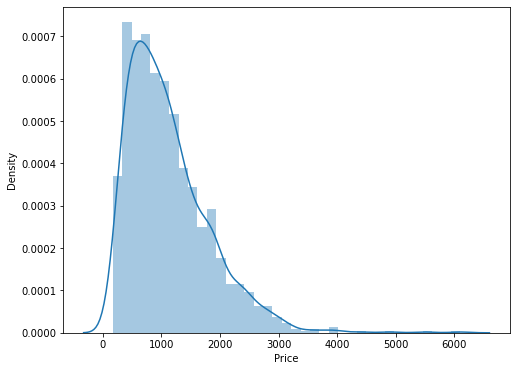

In [8]:
plt.figure(figsize=(8,6))
sns.distplot(df['Price'])
plt.show()

Distribution of the target variable is skewed

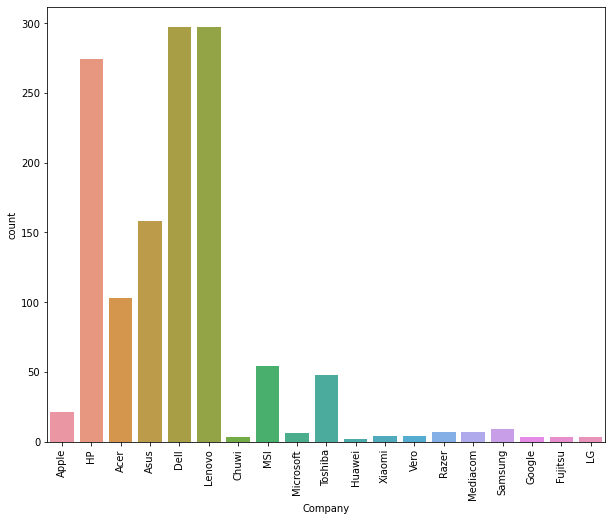

In [12]:
#Count plot(frequency plot) of a company shows that major categories are Lenovo, Dell, HP, Asus, etc.
plt.figure(figsize=(10,8))
sns.countplot(x=df['Company'])
plt.xticks(rotation='vertical')
plt.show()

# Impact of Company name on laptop price

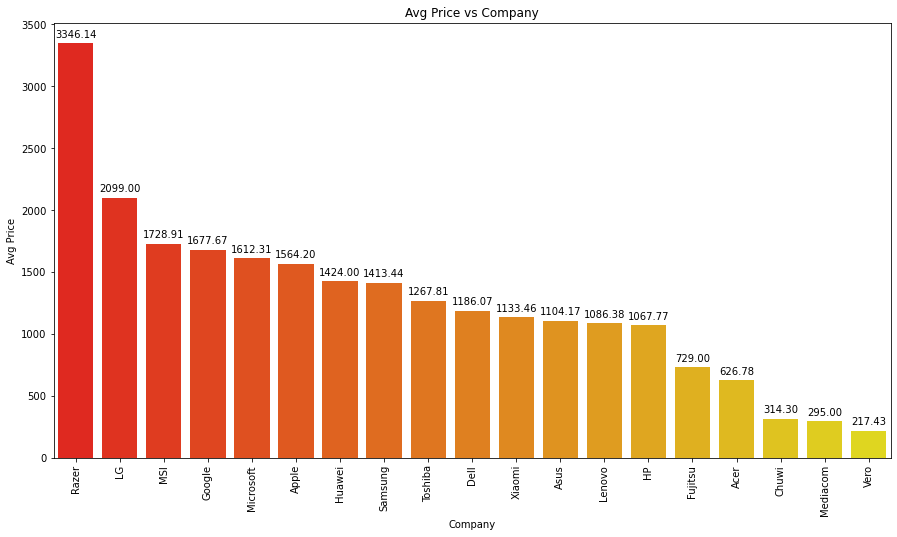

In [13]:
avg_price = df.groupby("Company")["Price"].mean()

avg_price = pd.DataFrame(data = avg_price)
avg_price.columns = ["Avg Price"]
avg_price.sort_values(by="Avg Price",ascending=False,inplace=True)

plt.figure(figsize=(15,8))
splot = sns.barplot(data=avg_price,x=avg_price.index, y = "Avg Price", palette = 'autumn')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.xticks(rotation='vertical')
plt.title('Avg Price vs Company')
plt.show()

Razer, LG, MSI, Google, Microsoft, Apple laptops are more expensive

# Impact of Type on laptop price

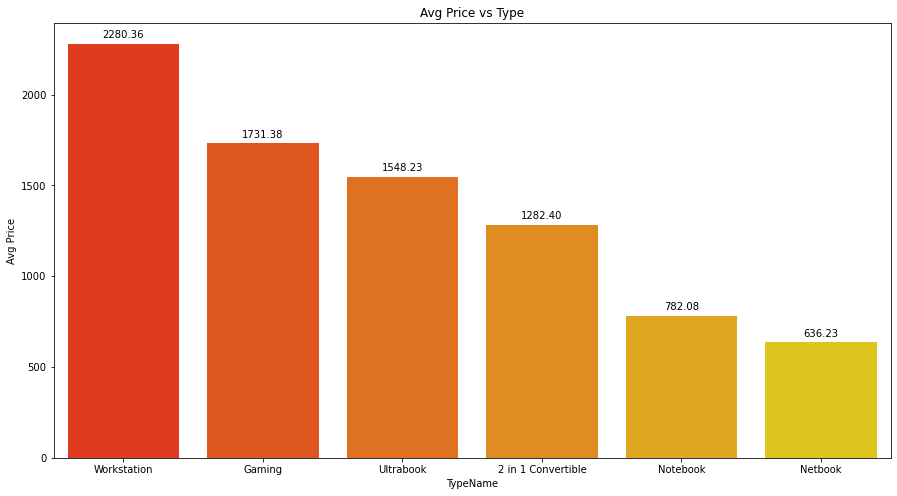

In [14]:
avg_price = df.groupby("TypeName")["Price"].mean()

avg_price = pd.DataFrame(data = avg_price)
avg_price.columns = ["Avg Price"]
avg_price.sort_values(by="Avg Price",ascending=False,inplace=True)

plt.figure(figsize=(15,8))
splot = sns.barplot(data=avg_price,x=avg_price.index, y = "Avg Price", palette = 'autumn')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

#plt.xticks(rotation='vertical')
plt.title('Avg Price vs Type')
plt.show()

Most people prefer Notebook because it is beyond budget.

# Impact of size in inches on laptop price

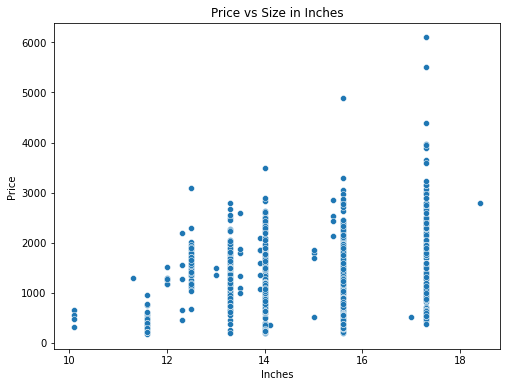

In [15]:
# A Scatter plot is used when both the columns are numerical
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Inches'], y=df['Price'])
plt.title('Price vs Size in Inches')
plt.show()

A relationship exists but not strong relationship

# ScreenResolution Column
contains-
1. the presence of an IPS panel, a laptop touch screen or not, and the X-axis and Y-axis screen resolution, 
2. so ScreenResolution is extracted into 3 new columns

In [16]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

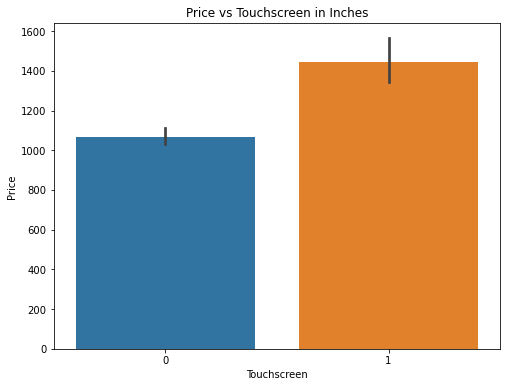

In [17]:
# Extract Touch screen information
# It is a binary variable so we can encode it as 0 and 1. one means the laptop is a touch screen and zero indicates not a touch screen.
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

#Plot against price
plt.figure(figsize=(8,6))
sns.barplot(x=df['Touchscreen'],y=df['Price'])
plt.title('Price vs Touchscreen in Inches')
plt.show()

Laptops with touchscreens are more expensive

<AxesSubplot:xlabel='Touchscreen', ylabel='count'>

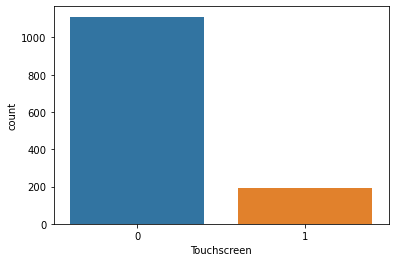

In [18]:
#how many laptops have touchscreen
sns.countplot(x=df['Touchscreen'])

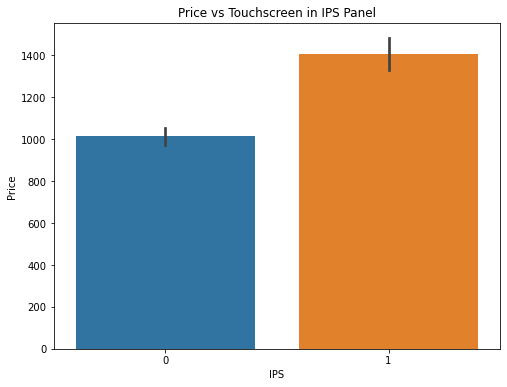

In [19]:
# Extract IPS Channel Presence information
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

#Plot against price
plt.figure(figsize=(8,6))
sns.barplot(x=df['IPS'],y=df['Price'])
plt.title('Price vs Touchscreen in IPS Panel')
plt.show()

Laptops with IPS Panel are more expensive

<AxesSubplot:xlabel='IPS', ylabel='count'>

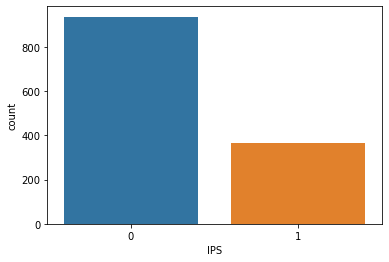

In [20]:
#how many laptops have IPS Panel
sns.countplot(x=df['IPS'])

# Extract X-axis and Y-axis screen resolution dimensions-
1. both the dimension are present at end of a string, separated with a cross sign 
2. the string is splitted with space and the last string is accessed from the list. 
3. then the string is splitted with a cross sign and the zero and first index is accessed for X and Y-axis dimensions

In [21]:
def findXresolution(s):
    return s.split()[-1].split("x")[0]
def findYresolution(s):
    return s.split()[-1].split("x")[1]

#finding the x_res and y_res from screen resolution
df['X_res'] = df['ScreenResolution'].apply(lambda x: findXresolution(x))
df['Y_res'] = df['ScreenResolution'].apply(lambda y: findYresolution(y))

#convert to numeric
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [22]:
df.corr()['Price'].sort_values(ascending=False)

Price          1.000000
Ram            0.743007
X_res          0.556529
Y_res          0.552809
IPS            0.252208
Weight         0.210370
Touchscreen    0.191226
Inches         0.068197
laptop_ID      0.067830
Name: Price, dtype: float64

# Creating PPI(Pixel Per Inches) from  inches, X and Y resolution 
1. correlation of columns with price shows that inches do not have a strong correlation but X and Y-axis resolution have a very strong resolution
2. So,  these three columns can be converted to a single column - as Pixel per inches(PPI)
3. dp = √(w2 + h2), Where w is the number of pixels that appear along the horizontal edge, and h is the number of pixels that appear along the vertical edge.
4. PPI = dp / di, Where di is the diagonal screen size in inches.

In [23]:
df['PPI'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.corr()['Price'].sort_values(ascending=False)

Price          1.000000
Ram            0.743007
X_res          0.556529
Y_res          0.552809
PPI            0.473487
IPS            0.252208
Weight         0.210370
Touchscreen    0.191226
Inches         0.068197
laptop_ID      0.067830
Name: Price, dtype: float64

In [24]:
# Drop the extra columns which are not of use
df.drop(columns = ['ScreenResolution', 'Inches','X_res','Y_res'], inplace=True)

# CPU Column

In [25]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [26]:
#first we will extract Name of CPU which is first 3 words from Cpu column and then we will check which processor it is
def fetch_processor(x):
    cpu_name = " ".join(x.split()[0:3])
    if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
        return cpu_name
    elif cpu_name.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'
df['Cpu Brand'] = df['Cpu'].apply(lambda x: fetch_processor(x))

# Droping Cpu Column
df.drop('Cpu', axis= 1, inplace=True)

# How does the price vary with processors?

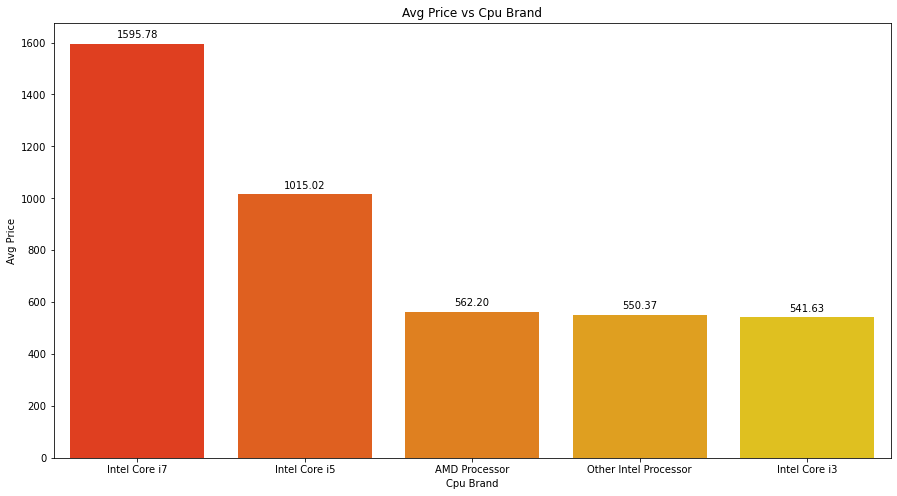

In [27]:
avg_price = df.groupby("Cpu Brand")["Price"].mean()

avg_price = pd.DataFrame(data = avg_price)
avg_price.columns = ["Avg Price"]
avg_price.sort_values(by="Avg Price",ascending=False,inplace=True)

plt.figure(figsize=(15,8))
splot = sns.barplot(data=avg_price,x=avg_price.index, y = "Avg Price", palette = 'autumn')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

#plt.xticks(rotation='vertical')
plt.title('Avg Price vs Cpu Brand')
plt.show()

1. price of i7 processor is high, then of i5 processor, i3 
2. and AMD processor lies at the almost the same range. 
3. Hence price will depend on the preprocessor

# How does the price vary with RAM?

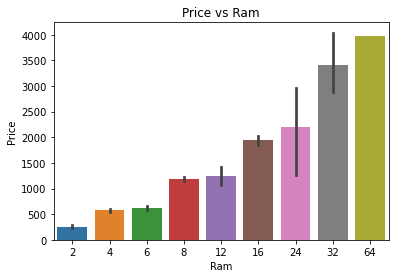

In [28]:
sns.barplot(x=df['Ram'], y=df['Price'])
plt.title('Price vs Ram')
plt.show()

Price is having a very strong positive correlation with Ram or a linear relationship

# Memory column

In [29]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

Memory Column contains 4 different categories of memory as HHD, SSD, Flash storage, and hybrid

In [30]:
#preprocessing
new = df['Memory'].str.split("+", n = 1, expand = True)

df['first']= new[0]
df['first']=df['first'].str.strip() # remove space at the start and end of the string
df['first'].fillna("0", inplace = True)

df['second']= new[1]
df['second']=df['second'].str.strip()
df['second'].fillna("0", inplace = True)

#binary encoding
df['Layer1HDD'] = df['first'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)

#binary encoding
df['Layer2HDD'] = df['second'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [31]:
# trying to convert to numerical value
df['first'] = df['first'].str.replace("HDD", "")
df['first'] = df['first'].str.replace("SSD", "")
df['first'] = df['first'].str.replace("Flash Storage", "")
df['first'] = df['first'].str.replace("Hybrid", "")

df['first'] = df['first'].str.replace(".0TB", "000") # making different unit to same unit
df['first'] = df['first'].str.replace("TB", "000")
df['first'] = df['first'].str.replace("GB", "") # removing GB Unit
df['first'] = df['first'].astype(int)

# trying to convert to numerical value
df['second'] = df['second'].str.replace("HDD", "")
df['second'] = df['second'].str.replace("SSD", "")
df['second'] = df['second'].str.replace("Flash Storage", "")
df['second'] = df['second'].str.replace("Hybrid", "")

df['second'] = df['second'].str.replace(".0TB", "000") 
df['second'] = df['second'].str.replace("TB", "000") # making different unit to same unit
df['second'] = df['second'].str.replace("GB", "") # removing GB Unit

df['second'] = df['second'].astype(int)

C:\Users\saman\AppData\Local\Temp/ipykernel_3812/3452472205.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(".0TB", "000") # making different unit to same unit
C:\Users\saman\AppData\Local\Temp/ipykernel_3812/3452472205.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(".0TB", "000")


In [32]:
#finalize the columns by keeping value
df['HDD']=(df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD'])
df['SSD']=(df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD'])
df['Hybrid']=(df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid'])
df['Flash_Storage']=(df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage'])
#Drop the un required columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [33]:
df.sample(10)

,laptop_ID,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
265,270,Dell,Inspiron 5579,2 in 1 Convertible,8,256GB SSD,Intel UHD Graphics 620,Windows 10,2.67,799.0,1,0,141.211998,Intel Core i5,0,256,0,0
719,727,HP,ProBook 470,Notebook,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.63,1200.0,0,0,127.335675,Intel Core i7,0,256,0,0
574,581,Lenovo,V330-15IKB (i5-8250U/4GB/500GB/FHD/W10),Notebook,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.05,685.0,0,0,141.211998,Intel Core i5,500,0,0,0
411,418,Lenovo,Thinkpad T470p,Ultrabook,8,512GB SSD,Nvidia GeForce GT 940MX,Windows 10,1.70,1943.0,0,1,209.800683,Intel Core i7,0,512,0,0
1068,1083,Dell,Alienware 15,Gaming,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,3.21,1329.0,0,0,282.423996,Intel Core i7,1000,256,0,0
820,829,Lenovo,V110-15ISK (i3-6006U/4GB/500GB/W10),Notebook,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.10,489.9,0,0,100.454670,Intel Core i3,500,0,0,0
439,446,Asus,VivoBook Max,Notebook,4,256GB SSD,Intel HD Graphics 620,Linux,2.00,559.0,0,0,141.211998,Intel Core i5,0,256,0,0
1195,1213,HP,Pavilion Power,Notebook,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.21,1327.0,0,1,141.211998,Intel Core i7,1000,128,0,0
852,863,Dell,Inspiron 5767,Notebook,8,1TB HDD,AMD Radeon R7 M445,Linux,2.83,865.0,0,0,127.335675,Intel Core i7,1000,0,0,0
626,633,Mediacom,SmartBook 140,Notebook,2,32GB Flash Storage,Intel HD Graphics,Windows 10,1.40,239.0,0,0,157.350512,Other Intel Processor,0,0,0,32


# Gpu Column

In [34]:
df['Gpu'].value_counts()

Intel HD Graphics 620      282
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
ARM Mali T860 MP4            1
Name: Gpu, Length: 106, dtype: int64

1. We are having which brand graphic card is on a laptop
2. we are not having how many capacities like (6Gb, 12 Gb) graphic card is present. 
3. so we will simply extract the name of the brand.

In [35]:
# Which brand GPU is in laptop
df['Gpu Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [36]:
df['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

In [37]:
# 1 row contains ARM processor, so it can be dropped
df.drop(df[(df['Gpu Brand'] == 'ARM')].index, inplace=True)

In [38]:
df['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu Brand, dtype: int64

# How does GPU Brand Affect Price?

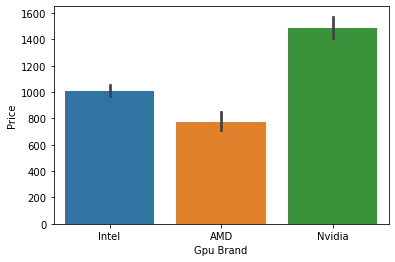

In [39]:
sns.barplot(x=df['Gpu Brand'], y=df['Price'])
plt.show()

Nvidia Gpu is more expensive

# OpSys Column

In [41]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [40]:
def fetch_os(x):
    os_name = x.split()[0] # Taking the first word of OpSys to determine which OS it is
    if os_name == 'Windows':
        return 'Windows'
    elif os_name == 'Linux':
        return 'Linux'
    elif os_name == 'Chrome':
        return 'Chrome'
    elif os_name == 'No':
        return 'No Os'
    elif os_name == 'Android':
        return 'Android'
    else:
        return 'Mac Os'
df['OS'] = df['OpSys'].apply(lambda x: fetch_os(x))

In [43]:
# 2 row contains Android OS, so it can be dropped
df.drop(df[(df['OS'] == 'Android')].index, inplace=True)

In [44]:
df['OS'].value_counts()

Windows    1125
No Os        66
Linux        62
Chrome       26
Mac Os       21
Name: OS, dtype: int64

# How does OS Affect Price?

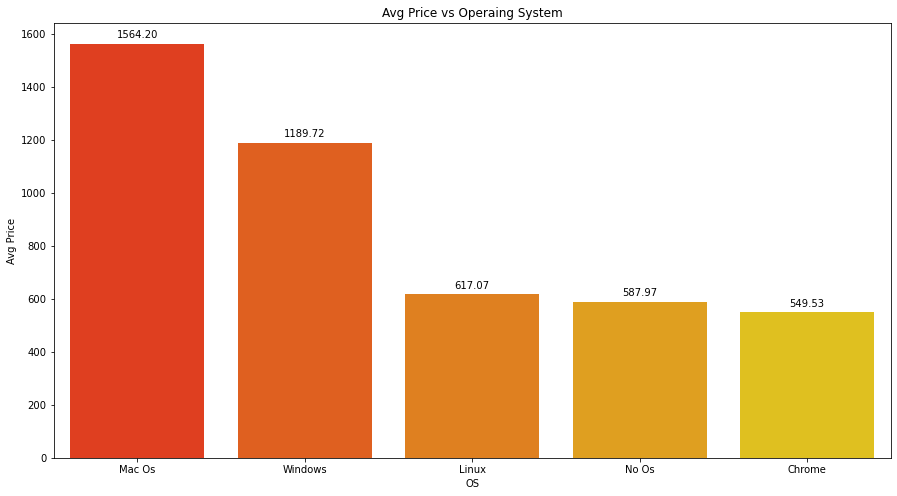

In [45]:
# when you plot price aginst operating system then as usual Mac is most expensive.
avg_price = df.groupby("OS")["Price"].mean()

avg_price = pd.DataFrame(data = avg_price)
avg_price.columns = ["Avg Price"]
avg_price.sort_values(by="Avg Price",ascending=False,inplace=True)

plt.figure(figsize=(15,8))
splot = sns.barplot(data=avg_price,x=avg_price.index, y = "Avg Price", palette = 'autumn')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

#plt.xticks(rotation='vertical')
plt.title('Avg Price vs Operaing System')
plt.show()

Laptop with MacOs is more expensive

In [46]:
# Removing Unnecessary columns
df.drop(columns=['laptop_ID','Product','Memory', 'Gpu', 'OpSys'],inplace=True)
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac Os
1,Apple,Ultrabook,8,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac Os
2,HP,Notebook,8,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,No Os
3,Apple,Ultrabook,16,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac Os
4,Apple,Ultrabook,8,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac Os


# Log-Normal Transformation of Target

1. Distribution of the target variable is right-skewed.
2. By transforming it to normal distribution performance of the algorithm will increase.
3. while separating dependent and independent variables we will take a log of price, and in displaying the result perform exponent of it.

In [48]:
df['log_price'] = np.log(df['Price'])
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage,Gpu Brand,OS,log_price
0,Apple,Ultrabook,8,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac Os,7.200194
1,Apple,Ultrabook,8,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac Os,6.801216
2,HP,Notebook,8,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,No Os,6.354370
3,Apple,Ultrabook,16,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac Os,7.838915
4,Apple,Ultrabook,8,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac Os,7.497540


C:\Users\saman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_price', ylabel='Density'>

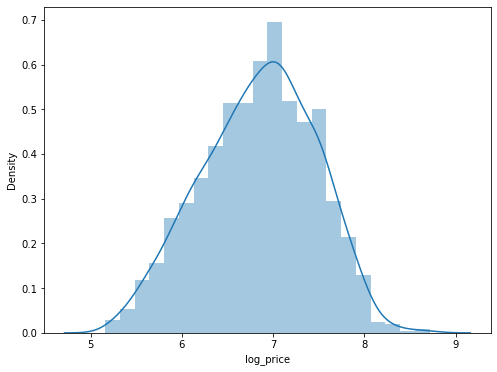

In [49]:
plt.figure(figsize=(8,6))
sns.distplot(df['log_price'])# log transformed distribution

In [50]:
df.to_csv('cleaned.csv')